# AI Project - Phase 2 (Destination Suggestion)
<div style="text-align: center">
<h1 style = "color: red"> Sharif University Of Technology</h1>
<h2 style = "color: green"> DR. Mahdieh Soleymani | DR. MohammadHossein Rohban </h2>
<h3 style = "color: cyan"> Head of Project: AmirHossein Razlighi <h3>
<h3 style = "color: cyan"> Designed By: AmirHossein Razlighi, Javad Hezareh, Payam Taebi, Alireza Sakhaei, Ali Banayeean, Yalda Shabanzadeh, Hamidreza Yaghoubi, Alireza Heidari <h3>
<h4 style = "color: white"> Ask your questions via quera</h4>
<h5> Save your file with format: STUDENT NUMBER_Phase2.ipynb or .zip </h5>
</div>

## Overview

<div style="text-align: center">
<img src="./Images/Uber_research.jpg" width="100%" height="auto" />
</div>

Suppose you are a research engineer at Uber and you are asked to design a system that suggests destinations to the passengers. The system should be able to suggest destinations based on the passenger's history. For example, one passenger may save a variety of locations (like home, work, gym, etc.). This passenger may go to gym, often on weekends and when he/she requests a car from Home.

So, for example, if I am a student, going to university usually from Saturday to Wednesday on 8:00 from "home", the next time I request a car from "home" on 8:00, the system should suggest "university" as the destination. Now, it's not that simple always, so we should seek for smart wayys to solve this problem!

As you may understood by now, we should engineer some of features from the data we have and try to predict the next destination of the passenger.

Let's begin!

## Setup

In [1]:
import random
import json
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import torch
import torch.nn as nn

random.seed(2024)
np.random.seed(2024)

# First Approach: Using KNN

## Data Preparation for KNN

In this part, you should prepare the data for KNN. You should load the dataset file that we provided, named `Data/output.json` and then clean it, do all the required preprocessings and then split into train-test-val sets if necessary. Note that we provided a splitted test set for you, named `Data/output_test.json`. You should not use this file for training or validation. You should only use it for testing your model.

In [2]:
# TODO: Load the dataset for training
train_dataset = pd.read_json('output.json')
train_dataset.head()

,user_id,Day,origin lat,origin lon,dest lat,dest lon,start_time,end_time,price
0,0,0,35.625,51.375,36.000,51.085,2024-01-30 13:07:00,2024-01-30 14:43:00,43.99
1,0,0,36.000,51.085,35.625,51.375,2024-01-30 15:13:00,2024-01-30 16:49:00,36.66
2,0,0,35.680,51.445,35.745,51.465,2024-01-30 20:41:00,2024-01-30 20:54:00,15.08
3,0,0,35.745,51.465,35.680,51.445,2024-01-30 21:24:00,2024-01-30 21:37:00,10.00
4,0,1,35.625,51.375,35.680,51.445,2024-01-30 23:38:00,2024-01-30 23:58:00,19.48


In [3]:
# TODO: Load the dataset for testing
test_dataset = pd.read_json('output_test.json')
test_dataset.head()

,user_id,Day,origin lat,origin lon,dest lat,dest lon,start_time,end_time,price
0,24,6,35.650,51.225,35.640,51.270,2024-01-30 11:58:00,2024-01-30 12:12:00,10.00
1,46,2,35.625,51.250,35.690,51.295,2024-01-30 21:58:00,2024-01-30 22:18:00,11.84
2,27,5,35.650,51.225,35.865,51.045,2024-01-30 20:05:00,2024-01-30 20:58:00,23.36
3,7,4,35.875,51.375,35.890,51.315,2024-01-30 17:39:00,2024-01-30 18:17:00,13.74
4,27,3,35.625,51.375,35.650,51.385,2024-01-30 13:16:00,2024-01-30 13:19:00,15.08


In [4]:
# print out the number of unique users and also randomly select one user
# TODO
unique_users = train_dataset['user_id'].unique()
print('Number of unique users: ', len(unique_users))
selected_user = random.choice(unique_users)
print('Selected user: ', selected_user)

Number of unique users:  60
Selected user:  30


In [5]:
!pip install keplergl
from keplergl import KeplerGl

# Uncomment the following line if you are using Google Colab
from google.colab import output
output.enable_custom_widget_manager()

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 9.7/9.7 MB 18.5 MB/s eta 0:00:00
  Installing build dependencies ... done
  Getting requirements to build wheel ... done
  Preparing metadata (pyproject.toml) ... done
  Using cached jedi-0.19.1-py2.py3-none-any.whl (1.6 MB)
  Created wheel for keplergl: filename=keplergl-0.3.2-py2.py3-none-any.whl size=17922315 sha256=662f1bf7d93dbe6d68b04680a48c62c12d2ba4677aafeff93a3a54339d898560
  Stored in directory: /root/.cache/pip/wheels/e5/e9/db/b8b8f2fcb5cb1cd7268d88959fce267bc00697cb8f50dcd0d9
Successfully built keplergl


In [6]:
# choose the data related to the randomly selected user
user_data = train_dataset[train_dataset['user_id'] == selected_user]
# show destinations of this user on map
destinations = user_data[['dest lat', 'dest lon']]

# You should Use Kepler.gl to visualize the data
map_0 = KeplerGl(data={"data_1": destinations})
map_0
# TODO

User Guide: https://docs.kepler.gl/docs/keplergl-jupyter


KeplerGl(data={'data_1':       dest lat  dest lon
8883    35.875    51.375
8884    35.775    51.400
8885    35…

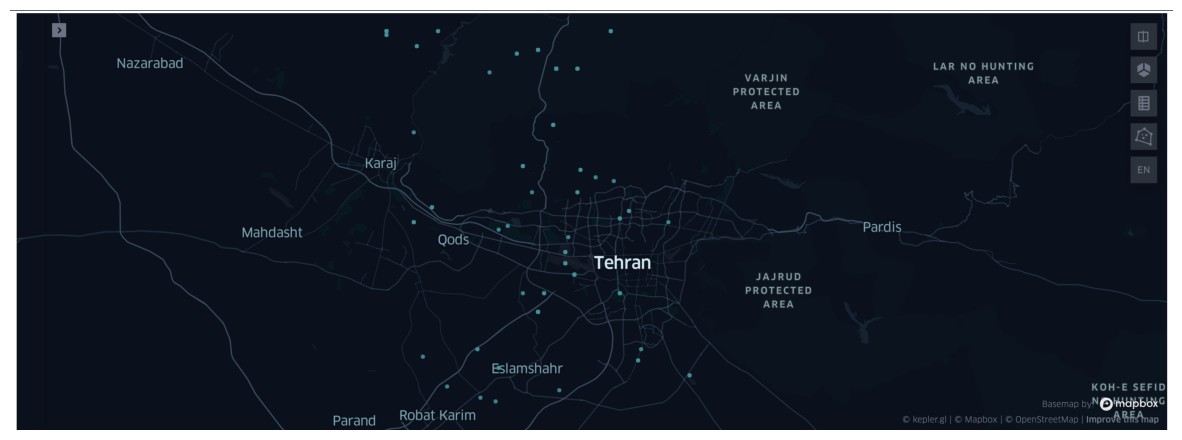

In [ ]:
# Sample output:

Here, you should do feature engineering stuff! Extract the features that you think are important. Split the features into training set and also extract the related outputs (used for our model further). These outputs may be strings (name of destination) or destination's latitude/longitude or etc. Use your creativity!

In [7]:
# TODO
train_features_for_user = train_dataset[['user_id','Day', 'origin lat','origin lon', 'start_time']]
train_result_for_user = train_dataset[['dest lat', 'dest lon']]
test_features_for_user = test_dataset[['user_id','Day', 'origin lat','origin lon', 'start_time']]
test_result_for_user = test_dataset[['dest lat', 'dest lon']]

In [8]:
# print out the shape of the train and test dataframes
# TODO
print((train_features_for_user.shape, train_result_for_user.shape),test_features_for_user.shape, test_result_for_user.shape)

((17994, 5), (17994, 2)) (4499, 5) (4499, 2)


## KNN Model

In this section, we are going to implement our KNN model. For further information on how KNN works, please refer to [this](https://en.wikipedia.org/wiki/K-nearest_neighbors_algorithm) link. As you can see, it's a simple algorithm. We will start with this and see the results of our _destination suggestion_ system.

In [429]:
# Define the model
# TODO: You can change the signature of functions and also add any function you need
from statistics import mode

class NearestNeighbor():
    def __init__(self,K):
      self.K = K

    def fit(self, train_X, train_y):
        self.X_train = train_X.to_numpy()
        for i in range(len(self.X_train)):
          self.X_train[i][4] = np.double(self.X_train[i][4].hour/5)
          self.X_train[i][2] = np.double(self.X_train[i][2]/5)




        self.X_train = np.array(self.X_train,dtype=np.float64)
        self.Y_train = train_y.to_numpy()
        self.train_count, self.featuers = train_X.shape

    def predict(self, x: pd.DataFrame):

        # initialize Y_predict
        x = x.to_numpy()
        for i in range(len(x)):
          x[i][4] = np.double(x[i][4].hour/5)
          x[i][2] = np.double(x[i][2]/5)


        x = np.array(x,dtype=np.float64)

        Y_predict = np.zeros( (len(x),2) )

        for i in range(len(x) ) :

            neighbors = self.find_neighbors( x[i] )
            # calculate the mean of K nearest neighbors
            new_y = []
            for j in range(len(neighbors)) :
              new_y.append((neighbors[j][0],neighbors[j][1]))
            #print(new_y)
            if i%5000==0:
              print(i)
            Y_predict[i] =mode( new_y )


        return Y_predict


    def find_neighbors( self, x ) :

        # calculate all the euclidean distances between current test
        # example x and training set X_train
        tmp = np.array(self.X_train - x)
        tmp[:,0] = np.where(tmp[:,0] != 0,0.75,tmp[:,0])
        euclidean_distances = np.linalg.norm(tmp , axis=1 )


        # sort Y_train according to euclidean_distance_array and
        # store into Y_train_sorted

        inds = euclidean_distances.argsort()

        Y_train_sorted = self.Y_train[inds][:self.K]

        return Y_train_sorted

    # Function to calculate euclidean distance



In [ ]:
# Fit the model on training data
Knn = NearestNeighbor(3)
Knn.fit(train_features_for_user,train_result_for_user)

In [9]:
def accuracy(res,pre):
  res = res.to_numpy()
  s = 0;
  for i in range(len(res)):
    if res[i][0]== pre[i][0] and res[i][1]== pre[i][1]:
      s+=1
  return s/len(res)



# Calculate the accuracy on training data
# TODO
pre = Knn.predict(train_features_for_user)
#print(pre)
print(accuracy(train_result_for_user,pre))


NameError: name 'Knn' is not defined

In [10]:
# Calculate the accuracy on test data
# TODO
pre = Knn.predict(test_features_for_user)
#print(pre)
print(accuracy(test_result_for_user,pre))






NameError: name 'Knn' is not defined

**QUESTION**: What do you think about this approach? Is it a good idea to use KNN for this problem? Why (or why not)? If the patterns in our datatset (passengers' history) get more complicated, will our model be robust to it in comparison to other models?

استفاده از این روش ساده است و نتیجه قابل قبولی هم دارد، اما با پیچیده تر شدن مدل به خوبی عمل نخواهد کرد، همچنین تعیین ضرایب در آن ساده نیست .
<br>
در صورتی که دیتای ترین بزرگتر شود، بسیار کند خواهد بود..


# Second Approach: Using XGBoost

In this part, we are going to use XGBoost to predict the next destination of the passenger. You can use `xgboost` library to implement this model. To learn more about XGBoost, please refer to [this](https://en.wikipedia.org/wiki/XGBoost) link. It should be familiar to you, as you saw decision trees in the class.

For this part, you can use the same data (that you did all the processes on) from the previous part. Or, if you need, you can reload the dataset and do new preprocessings on it.

You can see the overview of how XGBoost works in the image below:

<dev style="text-align: center">
<img src="./Images/XGBoost.png" />
</dev>

Although, this is for more information and you **do not** need to implement `XGBoost` from scratch. You can use the library that we mentioned above.

In [ ]:
%pip install xgboost

In [ ]:
import xgboost as xgb

# Defining the model
# TODO: You can change the signature of functions and also add any function you need
class Encoder():
    def __init__(self,classifier):
      self.classifier = classifier
      self.trans_dic={}
      self.invtrans_dic={}
      self.j=0




    def fit(self,x, y):
      self.X_train = x.to_numpy()
      for i in range(len(self.X_train)):
        self.X_train[i][4] = np.double(self.X_train[i][4].hour)

      self.X_train = np.array(self.X_train,dtype=np.float64)
      self.Y_train = y.to_numpy()
      for i in range(len(self.Y_train)):
        if (self.Y_train[i][0] , self.Y_train[i][1]) not in self.trans_dic:
          self.trans_dic[(self.Y_train[i][0] , self.Y_train[i][1])]= self.j
          self.invtrans_dic[self.j]= self.Y_train[i]
          self.j+=1

      self.Y_train = self.transform(self.Y_train)
      print(self.Y_train)



      self.classifier.fit(self.X_train ,self.Y_train)

    def transform(self, y):
      ny= []
      for i in range(len(y)):
        ny.append(self.trans_dic[(y[i][0] , y[i][1])])
      return ny

    def inverse_transform(self, enc):
      ny= []
      for i in range(len(enc)):
        ny.append(self.invtrans_dic[enc[i]])

      return np.array(ny)

    def predict(self, x):
      x = x.to_numpy()
      for i in range(len(x)):
        x[i][4] = np.double(x[i][4].hour)

      x = np.array(x,dtype=np.float64)
      pre = self.classifier.predict(x)
      return self.inverse_transform(pre)






In [ ]:
# TODO: fit the Encoder on training data

In [ ]:
# TODO: transform the training and test data
# and fit the model on training data
classifier = xgb.XGBClassifier(objective='multi:softmax')
enc = Encoder(classifier)
enc.fit(train_features_for_user,train_result_for_user)
...

[0, 1, 2, 3, 3, 1, 3, 1, 1, 4, 3, 1, 5, 1, 6, 3, 7, 3, 8, 1, 3, 9, 1, 3, 1, 10, 3, 3, 11, 1, 1, 3, 10, 3, 12, 3, 12, 3, 1, 1, 5, 1, 3, 1, 13, 1, 3, 4, 3, 5, 3, 1, 3, 14, 3, 12, 12, 3, 15, 15, 3, 1, 1, 3, 6, 3, 1, 3, 1, 3, 1, 3, 14, 3, 14, 12, 3, 16, 3, 1, 17, 1, 8, 5, 3, 1, 3, 18, 3, 1, 7, 1, 3, 3, 1, 19, 1, 3, 20, 3, 12, 21, 3, 1, 3, 3, 1, 3, 3, 1, 5, 1, 3, 4, 22, 1, 3, 1, 3, 3, 23, 3, 18, 3, 1, 2, 3, 3, 1, 3, 1, 1, 3, 1, 17, 3, 1, 19, 12, 3, 10, 1, 3, 1, 3, 5, 3, 1, 5, 3, 2, 3, 1, 10, 3, 1, 17, 1, 3, 3, 1, 3, 3, 3, 24, 3, 1, 3, 6, 3, 3, 1, 6, 3, 1, 3, 4, 3, 1, 3, 1, 18, 1, 3, 9, 3, 12, 1, 22, 3, 1, 3, 1, 3, 3, 1, 17, 1, 5, 1, 25, 1, 26, 12, 3, 3, 1, 5, 21, 1, 23, 3, 1, 3, 1, 27, 1, 5, 12, 3, 17, 3, 1, 3, 28, 1, 3, 3, 28, 3, 1, 3, 1, 11, 12, 3, 4, 3, 26, 3, 12, 3, 5, 3, 1, 8, 1, 3, 29, 3, 1, 3, 2, 3, 1, 1, 3, 4, 3, 13, 1, 6, 3, 28, 3, 1, 3, 30, 3, 1, 10, 1, 3, 31, 1, 3, 1, 3, 4, 3, 20, 1, 3, 29, 3, 3, 16, 3, 12, 3, 1, 2, 3, 1, 3, 29, 1, 1, 3, 3, 32, 3, 3, 12, 3, 1, 23, 1, 3, 1, 17, 1,

Ellipsis

In [ ]:
# TODO: print out train-data accuracy
pre = enc.predict(train_features_for_user)

print(accuracy(train_result_for_user,pre))

[  8   1   2 ...  46  18 109]
0.8008224963876848


In [ ]:
# TODO: print out test-data accuracy
pre = enc.predict(test_features_for_user)

print(accuracy(test_result_for_user,pre))

[80  6 83 ... 93 75 75]
0.6717048232940653


**QUESTION**: What do you think about this approach? Is it a good idea to use XGBoost for this problem? Why (or why not)? If the patterns in our datatset (passengers' history) get more complicated, will our model be robust to it in comparison to other models?

نسبت به مدل قبل بهتر عمل می کند، همچنین پردیکت در آن سریع تر است، اما در صورت بزرگ شدن و پیچیده شدن دیتاست ، ترین کند خواهد بود.، همچنین اسکیلبل نیست و با پیچیده شدن عملکرد آن افت خواهد کرد.

**Question**: Please explain the problem of overfitting in XGBoost. How can you solve it? Provide a brief explanation.

همانطور که مشخص است اورفیت در این مدل اتفاق افتاده است که برای کاهش آن میتوان پارامتر های مدل را ساده تر کرد، تا کاهش یابد ، همچنین استفاده از کراس ولیدیشن میتواند به بهبود آن کمک کند.

# Third Approach: Classifier Using Neural Networks

In this approach, we are going to use a classifier using neural networks. You can think of this approach and how to model the problem as a classification problem in many ways! So, we are not going to restrict your creativity. Just a hint: You can consider each of the unique destinations (in whole dataset) as a class and then train a classifier to classify the destinations.

## Data for Neural Network

Let's prepare the data for our neural network. Again, you should extract required features from the dataset and then split the dataset into train-test-val sets if necessary. For your ease, we prepared another version of `output.json` that helps you to extract features for this part, easier. So, please load `Data/trip_data.json` and use it for training set and validation set. You should use `Data/trip_data_test.json` for testing your model.

In [11]:
# load the training dataset
# TODO
train_trip = pd.read_json('trip_data.json')
train_trip.head()


,user_id,Day,origin,destination,start_time,end_time,price
0,0,0,"[work, [35.625, 51.375]]","[restaurant, [36.0, 51.085]]",2024-01-30 13:07:00,2024-01-30 14:43:00,43.99
1,0,0,"[restaurant, [36.0, 51.085]]","[work, [35.625, 51.375]]",2024-01-30 15:13:00,2024-01-30 16:49:00,36.66
2,0,0,"[home, [35.68, 51.445]]","[restaurant, [35.745, 51.465]]",2024-01-30 20:41:00,2024-01-30 20:54:00,15.08
3,0,0,"[restaurant, [35.745, 51.465]]","[home, [35.68, 51.445]]",2024-01-30 21:24:00,2024-01-30 21:37:00,10.00
4,0,1,"[work, [35.625, 51.375]]","[home, [35.68, 51.445]]",2024-01-30 23:38:00,2024-01-30 23:58:00,19.48


In [12]:
# load the test dataset
# TODO
test_trip = pd.read_json('trip_data_test.json')
test_trip.head()

,user_id,Day,origin,destination,start_time,end_time,price
0,24,6,"[pool, [35.65, 51.225]]","[home, [35.64, 51.27]]",2024-01-30 11:58:00,2024-01-30 12:12:00,10.00
1,46,2,"[university, [35.625, 51.25]]","[restaurant, [35.69, 51.295]]",2024-01-30 21:58:00,2024-01-30 22:18:00,11.84
2,27,5,"[pool, [35.65, 51.225]]","[restaurant, [35.865, 51.045]]",2024-01-30 20:05:00,2024-01-30 20:58:00,23.36
3,7,4,"[work, [35.875, 51.375]]","[home, [35.89, 51.315]]",2024-01-30 17:39:00,2024-01-30 18:17:00,13.74
4,27,3,"[work, [35.625, 51.375]]","[restaurant, [35.65, 51.385]]",2024-01-30 13:16:00,2024-01-30 13:19:00,15.08


In [13]:
# Extract features and do preprocessing if needed
# TODO
test_proc = pd.DataFrame((pd.DataFrame(test_trip['origin'].tolist(),columns=['origin','ol']))['ol'].tolist(),columns=['Origin Lat','Origin Long'])
test_proc =test_proc.merge(pd.DataFrame(test_trip['origin'].tolist(),columns=['origin','ol'])[['origin']],left_index=True, right_index=True)
test_proc =test_proc.merge(pd.DataFrame(test_trip['destination'].tolist(),columns=['destination','ol'])[['destination']],left_index=True, right_index=True)
test_proc =test_proc.merge(pd.DataFrame((pd.DataFrame(test_trip['destination'].tolist(),columns=['destination','ol']))['ol'].tolist(),columns=['Dest Lat','Dest Long']),left_index=True, right_index=True)
test_proc =test_proc.merge(test_trip[['user_id','Day','start_time','end_time','price']],left_index=True, right_index=True)

test_proc.head()

#test_results_trip = test_trip[['dest lat', 'dest lon']]

,Origin Lat,Origin Long,origin,destination,Dest Lat,Dest Long,user_id,Day,start_time,end_time,price
0,35.650,51.225,pool,home,35.640,51.270,24,6,2024-01-30 11:58:00,2024-01-30 12:12:00,10.00
1,35.625,51.250,university,restaurant,35.690,51.295,46,2,2024-01-30 21:58:00,2024-01-30 22:18:00,11.84
2,35.650,51.225,pool,restaurant,35.865,51.045,27,5,2024-01-30 20:05:00,2024-01-30 20:58:00,23.36
3,35.875,51.375,work,home,35.890,51.315,7,4,2024-01-30 17:39:00,2024-01-30 18:17:00,13.74
4,35.625,51.375,work,restaurant,35.650,51.385,27,3,2024-01-30 13:16:00,2024-01-30 13:19:00,15.08


In [14]:
# Extract features and do preprocessing if needed
# TODO

train_proc = pd.DataFrame((pd.DataFrame(train_trip['origin'].tolist(),columns=['origin','ol']))['ol'].tolist(),columns=['Origin Lat','Origin Long'])
train_proc =train_proc.merge(pd.DataFrame(train_trip['origin'].tolist(),columns=['origin','ol'])[['origin']],left_index=True, right_index=True)
train_proc =train_proc.merge(pd.DataFrame(train_trip['destination'].tolist(),columns=['destination','ol'])[['destination']],left_index=True, right_index=True)
train_proc =train_proc.merge(pd.DataFrame((pd.DataFrame(train_trip['destination'].tolist(),columns=['destination','ol']))['ol'].tolist(),columns=['Dest Lat','Dest Long']),left_index=True, right_index=True)
train_proc =train_proc.merge(train_trip[['user_id','Day','start_time','end_time','price']],left_index=True, right_index=True)
train_proc.head()


,Origin Lat,Origin Long,origin,destination,Dest Lat,Dest Long,user_id,Day,start_time,end_time,price
0,35.625,51.375,work,restaurant,36.000,51.085,0,0,2024-01-30 13:07:00,2024-01-30 14:43:00,43.99
1,36.000,51.085,restaurant,work,35.625,51.375,0,0,2024-01-30 15:13:00,2024-01-30 16:49:00,36.66
2,35.680,51.445,home,restaurant,35.745,51.465,0,0,2024-01-30 20:41:00,2024-01-30 20:54:00,15.08
3,35.745,51.465,restaurant,home,35.680,51.445,0,0,2024-01-30 21:24:00,2024-01-30 21:37:00,10.00
4,35.625,51.375,work,home,35.680,51.445,0,1,2024-01-30 23:38:00,2024-01-30 23:58:00,19.48


In [15]:
# print out the unique values for each column
# TODO
for column in test_proc.columns:
    print(f"Unique values in column '{column}': {test_proc[column].unique()}")



Unique values in column 'Origin Lat': [35.65  35.625 35.875 35.745 35.785 35.7   36.    35.95  35.9   35.84
 35.68  35.525 35.97  35.735 35.725 35.945 35.77  35.64  35.89  35.82
 35.91  35.5   35.845 35.99  35.675 35.705 35.55  35.69  35.54  35.575
 35.825 35.81  35.545 35.51  35.8   35.565 35.635 35.595 35.53  35.815
 35.805 35.52  35.775 35.905 35.995 35.765 35.865 35.83  35.71  35.505
 35.98  35.59  35.535 35.615 35.76  35.855 35.62  35.93  35.75  35.975
 35.56  35.74  35.955 35.555]
Unique values in column 'Origin Long': [51.225 51.25  51.375 51.275 51.125 51.465 51.435 51.115 51.    51.28
 51.495 51.24  51.445 51.135 51.1   51.215 51.2   51.13  51.3   51.085
 51.245 51.385 51.27  51.315 51.19  51.235 51.295 51.165 51.075 51.5
 51.32  51.11  51.145 51.155 51.21  51.12  51.42  51.29  51.095 51.06
 51.39  51.475 51.485 51.185 51.285 51.4   51.31  51.045 51.035 51.415
 51.37  51.345 51.17  51.09  51.46  51.15  51.35  51.26  51.05  51.47
 51.305 51.18  51.175 51.025 51.195]
Unique valu

In [16]:
import pandas as pd

# print out the data type of each column
# TODO
print(test_proc.dtypes)



Origin Lat            float64
Origin Long           float64
origin                 object
destination            object
Dest Lat              float64
Dest Long             float64
user_id                 int64
Day                     int64
start_time     datetime64[ns]
end_time       datetime64[ns]
price                 float64
dtype: object


Based on your features and how you extracted them, you may need to use some encodings for your data. For example, if you have different classes as names (`str` data type. E.g. "gym") you need to make it a numeric value in order to feed it into your neural network. You can use `sklearn`'s functions (such as `LabelEncoder`, `OneHotEncoder`, `StandardScaler`, etc.) to do these kind of stuff!

In [17]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, LabelEncoder,OneHotEncoder


train_proc_np = train_proc.to_numpy()
for i in range(len(train_proc_np)):
  train_proc_np[i][9] = ((train_proc_np[i][9] - train_proc_np[i][8]).value/ 10**9)/60
  train_proc_np[i][8] = np.double(train_proc_np[i][8].hour)


test_proc_np = test_proc.to_numpy()
for i in range(len(test_proc_np)):
  test_proc_np[i][9] = ((test_proc_np[i][9] - test_proc_np[i][8]).value/ 10**9)/60
  test_proc_np[i][8] = np.double(test_proc_np[i][8].hour)




source_enc = OneHotEncoder()
dest_enc = LabelEncoder()
new_train_np = (source_enc.fit_transform(train_proc_np[:,2].reshape(-1, 1))).toarray()
new_test_np = (source_enc.fit_transform(test_proc_np[:,2].reshape(-1, 1))).toarray()
train_proc_np = np.delete(train_proc_np, 2, axis=1)
test_proc_np = np.delete(test_proc_np, 2, axis=1)

train_proc_np[:,2] = (dest_enc.fit_transform(train_proc_np[:,2]))
test_proc_np[:,2] = (dest_enc.transform(test_proc_np[:,2]))

train_features_np = np.delete(train_proc_np, [0,1,2,3,4], axis=1)
train_results_np = train_proc_np[:,[2]]
test_features_np = np.delete(test_proc_np, [0,1,2,3,4], axis=1)
test_results_np = test_proc_np[:,[2]]
print(test_features_np[0:10])

encoder_std = StandardScaler()
train_features_np=encoder_std.fit_transform(train_features_np)
test_features_np = encoder_std.transform(test_features_np)
train_results_np = np.array(train_results_np,dtype=np.float64)
test_results_np = np.array(test_results_np,dtype=np.float64)
train_features_np = np.array(train_features_np,dtype=np.float64)
test_features_np = np.array(test_features_np,dtype=np.float64)
train_features_np = np.concatenate((train_features_np, new_train_np), axis=1)
test_features_np = np.concatenate((test_features_np, new_test_np), axis=1)
#print(test_features_np[0:10])

# Finalize the data (do all preprocessing needed)
# TODO

[[24 6 11.0 14.0 10.0]
 [46 2 21.0 20.0 11.84]
 [27 5 20.0 53.0 23.36]
 [7 4 17.0 38.0 13.74]
 [27 3 13.0 3.0 15.08]
 [41 4 13.0 58.0 22.13]
 [58 0 13.0 28.0 19.59]
 [55 3 21.0 37.0 21.36]
 [4 0 23.0 17.0 11.67]
 [29 1 7.0 18.0 21.81]]


Create `train_dataset` and its loader, also create `test_dataset` and its loader. You should also create `val_dataset` and its loader if you want to use validation set. You may need to implement a custom `torch.Dataset` class for your ease. Your loaders should be able to load data in batches.

In [51]:
import pandas as pd
from sklearn.model_selection import train_test_split
import torch
from torch.utils.data import Dataset, DataLoader,TensorDataset
import torch.nn as nn
import torch.nn.functional as F
import torch.optim as optim
import matplotlib.pyplot as plt

# TODO
train_x, val_x, train_y, val_y =  train_test_split(train_features_np, train_results_np, test_size=0.1)
test_x = test_features_np
test_y = test_results_np
train_x = torch.from_numpy(train_x)
val_x = torch.from_numpy(val_x)
train_y = torch.from_numpy(train_y)
val_y = torch.from_numpy(val_y)
test_x = torch.from_numpy(test_x)
test_y = torch.from_numpy(test_y)

train_dataset = TensorDataset(train_x,train_y)
val_dataset = TensorDataset(val_x,val_y)
test_dataset = TensorDataset(test_x,test_y)

# Batch size
batch_size = 80

# DataLoader
train_loader = DataLoader(train_dataset, batch_size, shuffle=False)
val_loader = DataLoader(val_dataset, len(val_dataset), shuffle=False)
test_loader = DataLoader(test_dataset, len(test_dataset), shuffle=False)

## Neural Network Model

Here, you should implement your neural network model. You should use `pytorch`. **Note** that you should plot the loss function of your model during the training phase. (on both training and validation sets)

In [52]:
# Implement the train_model function
def train_model(model, train_loader, val_loader, criterion, optimizer, epochs):
    lls_train = []
    lls_val = []
    for epoch in range(epochs):
      model.train()
      for train_features, train_labels in train_loader:
        optimizer.zero_grad()
        y_pred = model(train_features)
        loss = criterion(y_pred, train_labels[:,0].long())
        loss.backward()
        optimizer.step()
      lls_train.append(np.double(loss))
      model.eval()
      val_f,val_l = next(iter(val_loader))
      Y_hat = model(val_f)
      val_loss = criterion(Y_hat, val_l[:,0].long())
      lls_val.append(np.double(val_loss))
      print(f'Finished epoch {epoch}, Train Loss: {loss}, Val Loss: {val_loss}')
    return  lls_train, lls_val



# Implement the MLP class with your choice of architecture
# TODO: You can change the signature of functions and also add any function you need
class MLP(nn.Module):
    def __init__(self, input_dim, output_dim):
        super().__init__()
        self.hidden1 = nn.Linear(input_dim, 256)
        self.act1 = nn.ReLU()
        self.hidden2 = nn.Linear(256, 128)
        self.act2 = nn.Sigmoid()
        self.hidden3 = nn.Linear(32, 32)
        self.act3 = nn.ReLU()
        self.output = nn.Linear(128, output_dim)
        self.act_output = nn.Sigmoid()
        self.double()



    def forward(self, x):
        x = self.act1(self.hidden1(x))
        x = self.act2(self.hidden2(x))
        #x = self.act3(self.hidden3(x))

        x = self.act_output(self.output(x))
        return x


# TODO
# Define Model, Loss, Optimizer
model = MLP(12,int(max(train_results_np[:,0])+1))
criterion = nn.CrossEntropyLoss()
optimizer = optim.Adam(model.parameters(), lr=0.005)

Finished epoch 0, Train Loss: 1.4485037718292135, Val Loss: 1.3723502171096125
Finished epoch 1, Train Loss: 1.4050840592513685, Val Loss: 1.331689082776458
Finished epoch 2, Train Loss: 1.3630663660512659, Val Loss: 1.3098431088586864
Finished epoch 3, Train Loss: 1.3688030418520423, Val Loss: 1.3027719937625135
Finished epoch 4, Train Loss: 1.3604254964552973, Val Loss: 1.3043631403647393
Finished epoch 5, Train Loss: 1.3602877050559026, Val Loss: 1.2992185155827236
Finished epoch 6, Train Loss: 1.3601901548123383, Val Loss: 1.3005646388627568
Finished epoch 7, Train Loss: 1.3602113619889569, Val Loss: 1.3036306390483579
Finished epoch 8, Train Loss: 1.3603597896066926, Val Loss: 1.300091093538803
Finished epoch 9, Train Loss: 1.360062662600368, Val Loss: 1.2997808657460046
Finished epoch 10, Train Loss: 1.3601139422394954, Val Loss: 1.3061055063522267
Finished epoch 11, Train Loss: 1.3600714866991717, Val Loss: 1.301467918911046
Finished epoch 12, Train Loss: 1.3548531809526534, Val

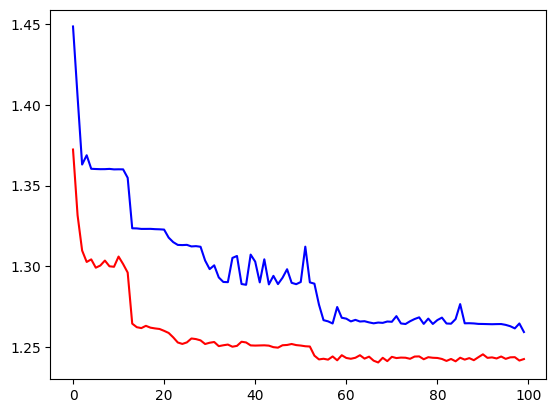

In [53]:
lls_train,lls_val =train_model(model, train_loader, val_loader, criterion, optimizer, epochs=100)
import matplotlib.pyplot as plt


plt.plot(lls_train, color= 'blue')
plt.plot(lls_val, color= 'red')




## Evaluate Neural Network Model

Report the model's accuracy on the test set.

In [54]:
model.eval()

def accuracy_ff(res,pre):

  s = torch.sum((res==pre))
  return s/len(res)
# report model accuracy on test data
x,y = next(iter(test_loader))
pre = model(x)
print(accuracy_ff(y[:,0].long(),torch.argmax(pre,dim=1)))
# TODO



tensor(0.9006)


Just for the sake of curiosity, let's take a random sample from the test set and see the model's prediction. So, randomly choose a sample from the test set and print it out (to see its features and also the correct output). Then, feed the features into your model and see what it predicts. Is it correct?

In [28]:
import random
# TODO: choose a random sample from test data and print it out
ran = random.randrange(len(test_dataset))
print(test_proc.iloc[ran])


Origin Lat                  35.625
Origin Long                 51.375
origin                        work
destination             restaurant
Dest Lat                    35.765
Dest Long                   51.075
user_id                          3
Day                              1
start_time     2024-01-30 13:32:00
end_time       2024-01-30 14:33:00
price                        25.93
Name: 2488, dtype: object


In [29]:
# TODO: predict the destination of the above sample
# print out the prediction
x,y = test_dataset[ran]
pre = model(x)

pre = np.argmax(pre.detach().numpy())
print(pre)

#pre = dest_enc.inverse_transform([pre])


4


In [30]:
# TODO: print out the actual destination of the above sample
print(int(y))




4


Now, use the inverse transform of the encoding you used earlier to get the name of the destination from the predicted class. Print it out and see if it's correct.

In [31]:
# TODO: use inverse_transform to print out the actual name of destination of the above sample
y = dest_enc.inverse_transform([int(y)])

print(y)



['restaurant']


**QUESTION**: What do you think about this approach? Is it a good idea to use Neural Networks for this problem? Why (or why not)? If the patterns in our datatset (passengers' history) get more complicated, will our model be robust to it in comparison to other models?

همانطور که مشخص است این روش بهترین نتیجه را داده است، همچنین سرعت پردیکت آن بیشتر از کی ان ان است، در صورتی که پترن ها پیچیده تر شوند، ممکن است نیاز باشد مدل پیچیده تر شود، اما همچنان میتواند جوابگو باشد. به نسبت دیگر مدل ها در مجموع گزینه بهتری است.

# How to Submit:

Please upload your notebook (`.ipynb`) compressed (as a `.zip` file) or uncompressed on Quera. **Note** that for each part, the accuracy of your model on the given test dataset is important. So, your accuracy should be **at least** same as ours (or better). Also, we will check your code after the submission. So, please make sure that there are no **data snooping** or **data leakage** in your code. You **can not** use the test data in any stages for your model, except for the final evaluation part! So, please be ware of that, or you may lose points.

Your project is graded via 2 main parts:
1. Checking out your implementation (to check if there are no "data snooping" and "data leakage")
   
2. Checking accuracies of your models on the test set.

3. Running again your code by you in the "in-person" session and hearing your explanations (on the parts that we asked questions about the models, overfitting and etc. with tag "QUESTION" in the notebook).